##  Lab 4-Implementation of Decision Tree on Titanic dataset.

### Ussen Qarlygash, group - 2285

In [1126]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1127]:
# Reading the dataset
df = pd.read_csv('titanic.csv')
# iris = datasets.load_iris()
# X, y = iris.data, iris.target
# df = pd.DataFrame(X, columns=iris.feature_names)
# df['species'] = y

In [1128]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [1129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [1130]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [1131]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [1132]:
# df[['Age', 'Fare', 'Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']] = df[['Age', 'Fare', 'Survived', 'Pclass', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']].replace(0, np.nan)


In [1133]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [1134]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


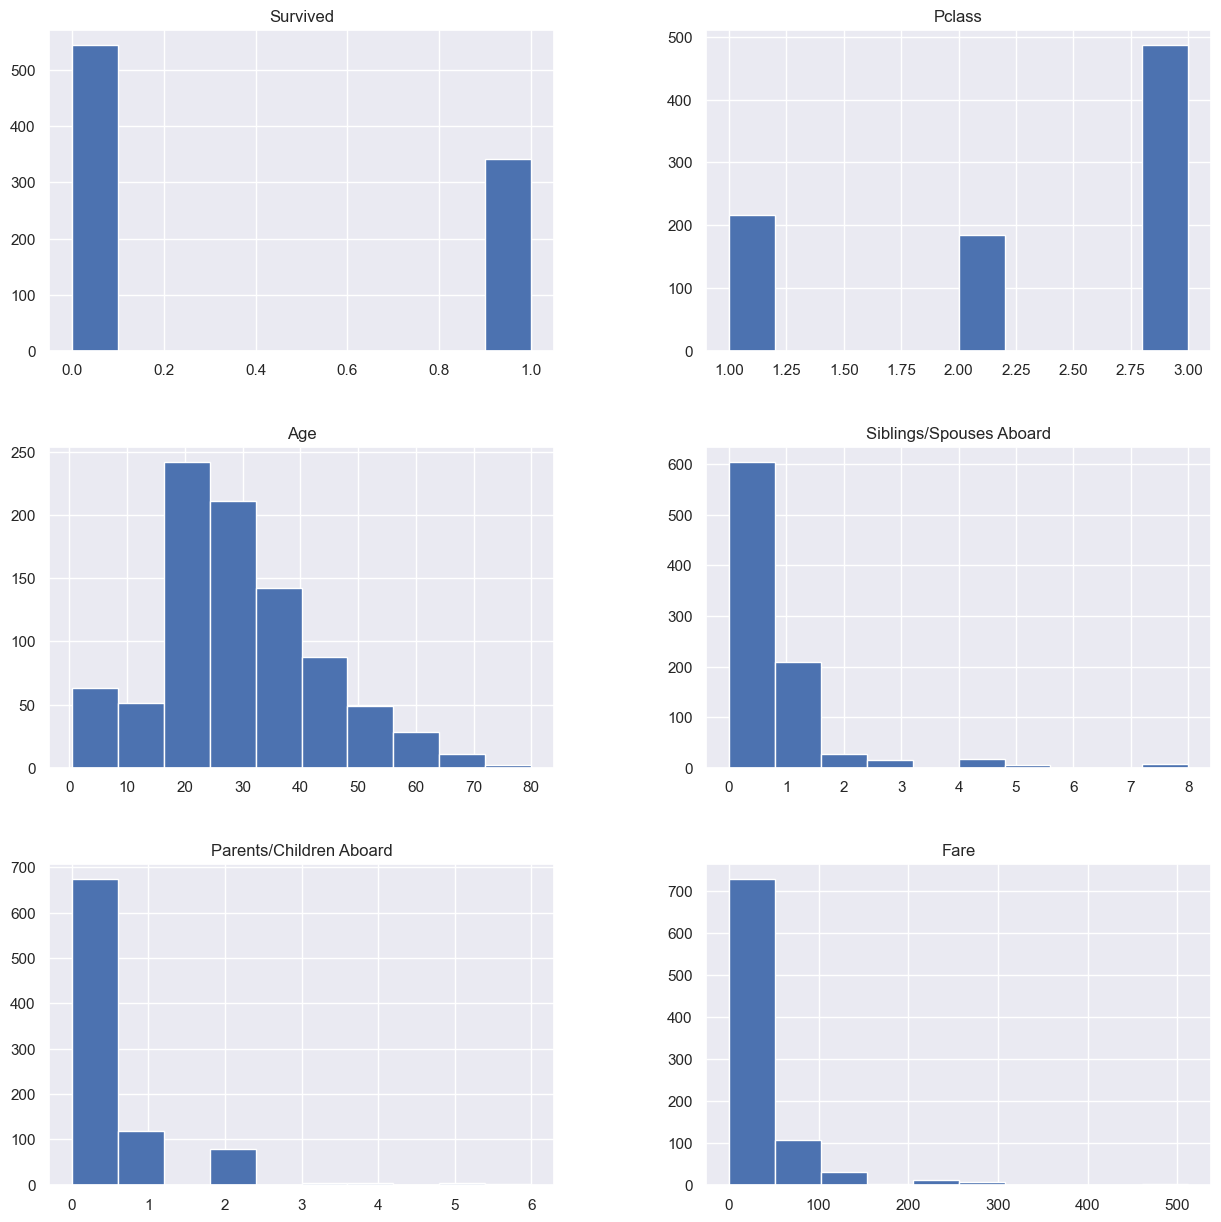

In [1135]:
df.hist(figsize=(15,15));

In [1136]:
# df['Survived'].fillna(0, inplace=True)
# df['Parents/Children Aboard '].fillna(df['Parents/Children Aboard '].mean(), inplace = True)
# df['Siblings/Spouses Aboard'].fillna(df['Siblings/Spouses Aboard'].mean(), inplace = True)
# df['Fare '].fillna(df['Fare '].mean(), inplace = True)
# df['species'].fillna(df['species'].median(), inplace = True)
# df.dropna(inplace=True)


df = df.drop('Name', axis=1)
#df = df.drop('Sex', axis=1)
df['Sex'] = df['Sex'].map({"male": 0, "female": 1})
# df = df.drop('Age', axis=1)
#df['Sex'] = df['Sex'].replace({'male': 1, 'female': 0})
#df = df.drop('Sex', axis=1)

In [1137]:
df.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.354002,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


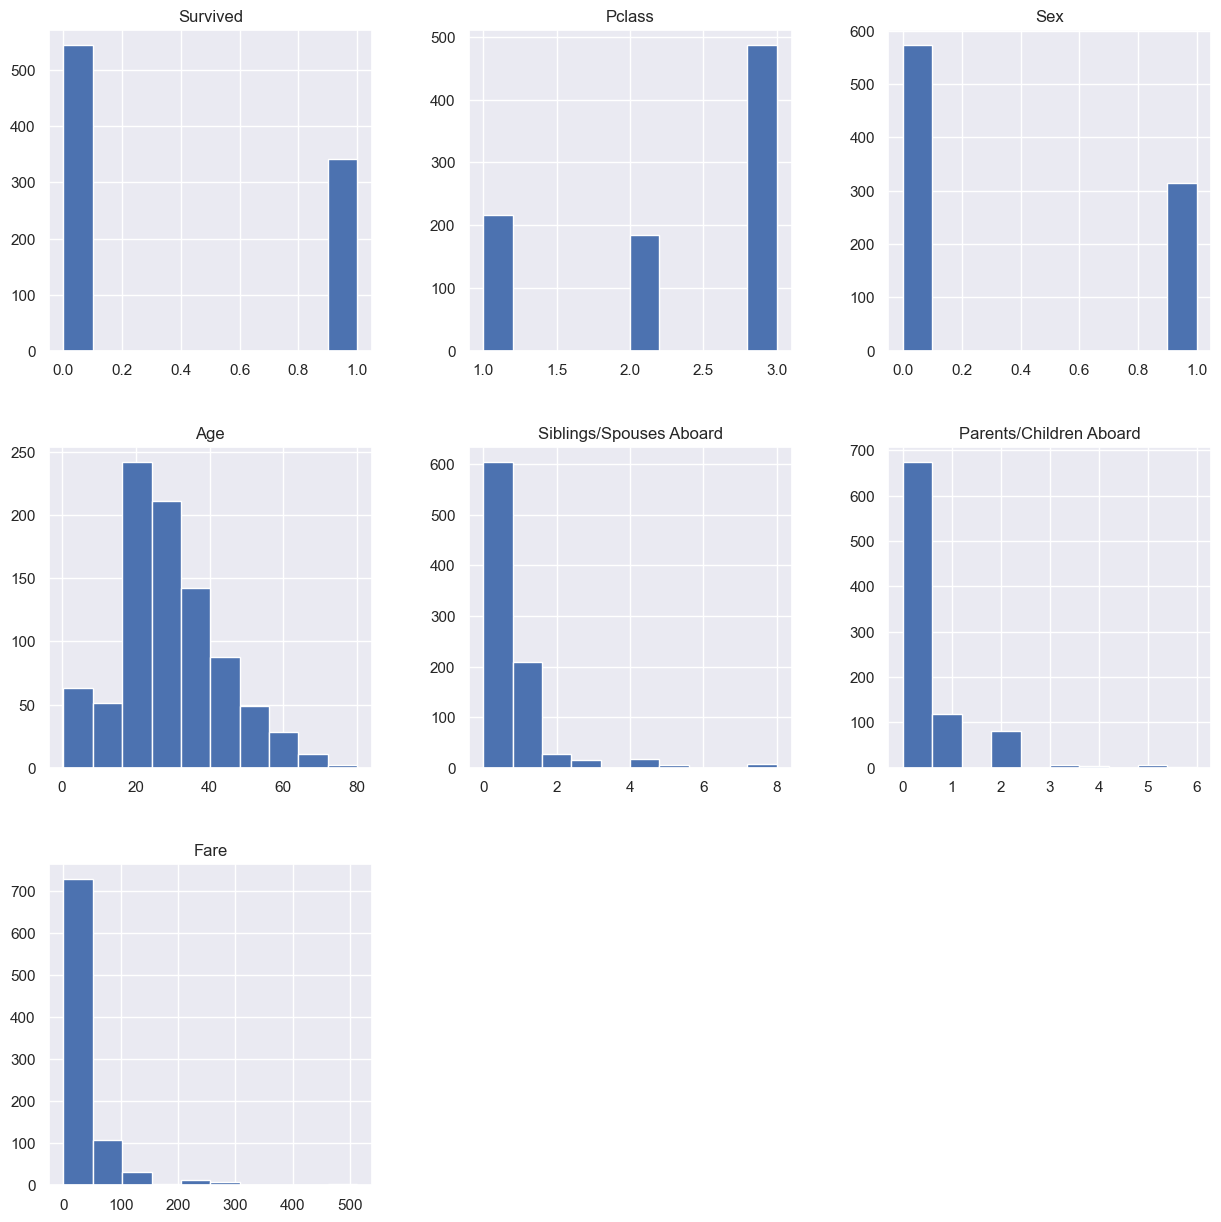

In [1138]:
df.hist(figsize=(15,15));

In [1139]:
df.corr()['Pclass']

Survived                  -0.336528
Pclass                     1.000000
Sex                       -0.129507
Age                       -0.391492
Siblings/Spouses Aboard    0.085026
Parents/Children Aboard    0.020252
Fare                      -0.548919
Name: Pclass, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

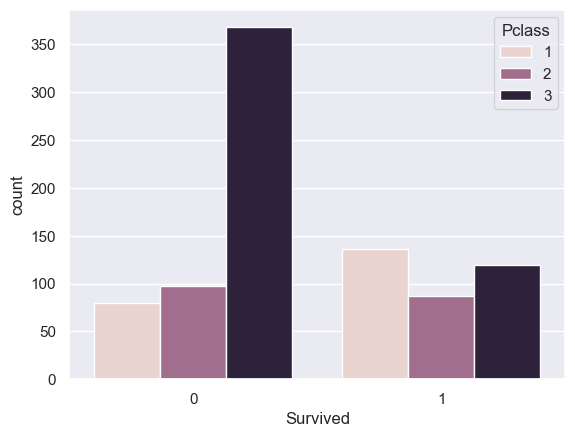

In [1140]:
sns.countplot(data = df,x='Survived',hue='Pclass')

<Axes: ylabel='Density'>

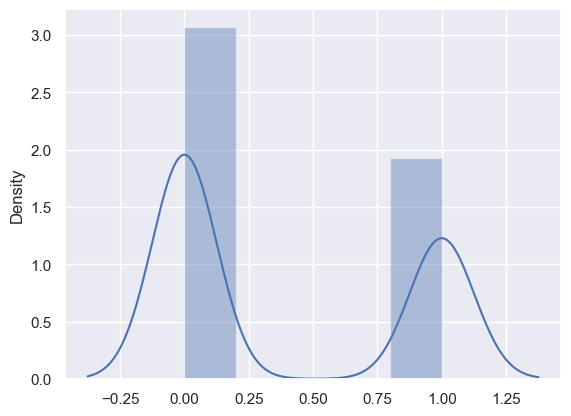

In [1141]:
sns.distplot(x=df['Survived'])

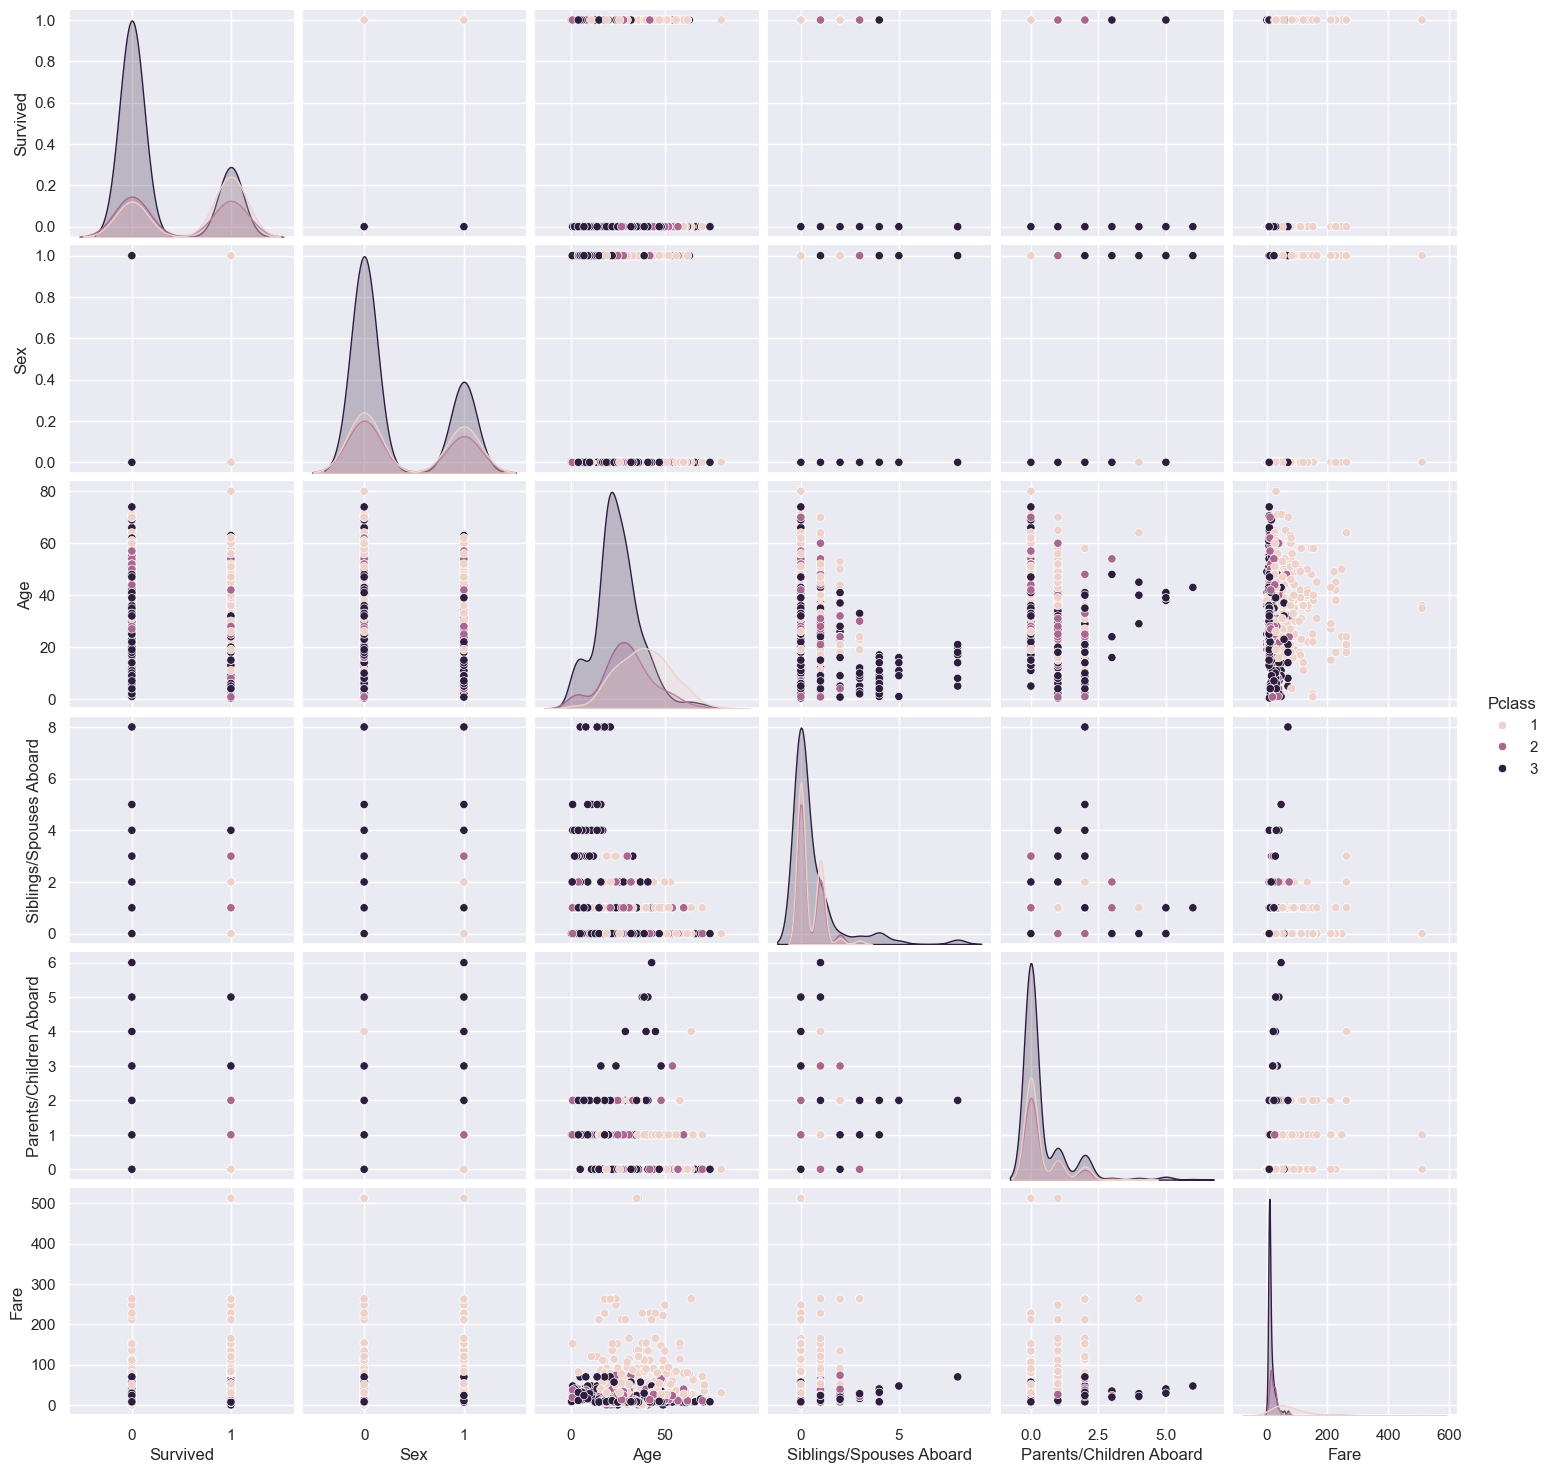

In [1142]:
sns.pairplot(data = df,hue='Pclass')

<Axes: >

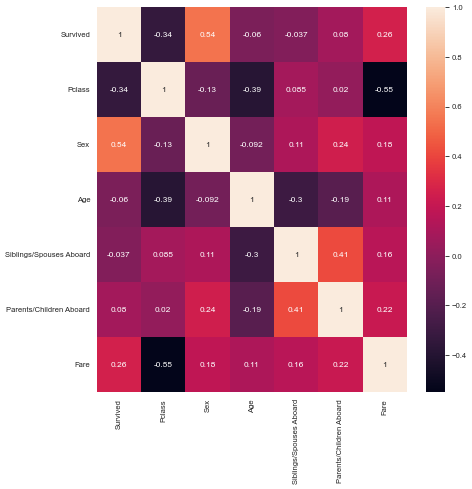

In [1143]:
plt.figure(figsize=(10,10),dpi=50)
sns.heatmap(df.corr(),annot=True)

In [1144]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [1145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)  #0.2 and 70 was the best!
#, random_state=42

In [1146]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=80)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=400)
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [1147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [1148]:
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.fit_transform(X3_test)

X4_train_scaled = scaler.fit_transform(X4_train)
X4_test_scaled = scaler.fit_transform(X4_test)

# Appling Decision Tree

In [1149]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [1150]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[3,4,5,10,40,50,55,60,70,80, 100,120, 200, 300,400], 
              'max_depth':[2,3,4,5,6,7,8,9,10,11,15,35,45],
              'class_weight':('balanced', None),
#               'presort':(False,True),
             }

In [1151]:
dt_model = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(dt_model, parameters)
# gsearch.cv_results_
#scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
#scores
# model.fit(X_train, y_train)

In [1152]:
y_train = y_train.astype(int)
X_train_scaled = X_train_scaled.astype(int)


In [1153]:
gsearch.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 35,
                                       45],
                         'min_samples_split': [3, 4, 5, 10, 40, 50, 55, 60, 70,
                                               80, 100, 120, 200, 300, 400]})

In [1154]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 3}

In [1155]:
model = gsearch.best_estimator_
model

DecisionTreeClassifier(max_depth=6, min_samples_split=3)

In [1156]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=15, scoring='f1_macro')
scores

array([0.76585366, 0.82577132, 0.88455988, 0.82222222, 0.79943101,
       0.65729167, 0.88619855, 0.65185185, 0.81568627, 0.88619855,
       0.84662005, 0.72352941, 0.64977645, 0.81048387, 0.82330827])

In [1157]:
mean_accuracy = sum(scores) / len(scores)
print(f'Средняя accuracy: {round(mean_accuracy*100, 2)} %')

Средняя accuracy: 78.99 %


In [1158]:
model2 = gsearch.best_estimator_
model2

DecisionTreeClassifier(max_depth=6, min_samples_split=3)

In [1159]:
gsearch.fit(X2_train_scaled, y2_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 35,
                                       45],
                         'min_samples_split': [3, 4, 5, 10, 40, 50, 55, 60, 70,
                                               80, 100, 120, 200, 300, 400]})

In [1160]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 3}

In [1161]:
scores2 = cross_val_score(model2, X2_train_scaled, y2_train, cv=15, scoring='f1_macro')
scores2

array([0.75813101, 0.77229602, 0.81783681, 0.74603175, 0.78341014,
       0.64393939, 0.76310484, 0.75486012, 0.68714798, 0.83656234,
       0.77559682, 0.81048387, 0.84067797, 0.81048387, 0.93171913])

In [1162]:
mean_accuracy2 = sum(scores2)/len(scores2)
mean_accuracy2

0.7821521370317231

In [1163]:
model3 = gsearch.best_estimator_
model3

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [1164]:
gsearch.fit(X3_train_scaled, y3_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 35,
                                       45],
                         'min_samples_split': [3, 4, 5, 10, 40, 50, 55, 60, 70,
                                               80, 100, 120, 200, 300, 400]})

In [1165]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'min_samples_split': 5}

In [1166]:
scores3 = cross_val_score(model3, X3_train_scaled, y3_train, cv=15, scoring='f1_macro')
scores3

array([0.73333333, 0.84680851, 0.80363636, 0.79259259, 0.81939799,
       0.79259259, 0.84680851, 0.70860315, 0.84444444, 0.78897502,
       0.87318841, 0.773358  , 0.79      , 0.70860315, 0.82142857])

In [1167]:
mean_accuracy3 = sum(scores3)/len(scores3)
mean_accuracy3

0.7962513754845145

In [1168]:
model4 = gsearch.best_estimator_
model4

DecisionTreeClassifier(max_depth=9, min_samples_split=5)

In [1169]:
gsearch.fit(X4_train_scaled, y4_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 35,
                                       45],
                         'min_samples_split': [3, 4, 5, 10, 40, 50, 55, 60, 70,
                                               80, 100, 120, 200, 300, 400]})

In [1170]:
gsearch.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 3}

In [1171]:
scores4 = cross_val_score(model4, X4_train_scaled, y4_train, cv=15, scoring='f1_macro')
scores4

array([0.79259259, 0.80896686, 0.81567398, 0.68163265, 0.87218503,
       0.81846932, 0.77568389, 0.86662329, 0.67037724, 0.6925    ,
       0.72883598, 0.795     , 0.73717949, 0.87322202, 0.75992193])

In [1172]:
mean_accuracy4 = sum(scores4)/len(scores4)
mean_accuracy4

0.7792576180987043

In [1173]:
# best_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=20)

In [1174]:
# scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
# scores

[Text(0.5, 0.9, 'x[1] <= 0.5\ngini = 0.477\nsamples = 709\nvalue = [430, 279]'),
 Text(0.25, 0.7, 'x[0] <= -0.5\ngini = 0.317\nsamples = 450\nvalue = [361, 89]'),
 Text(0.125, 0.5, 'x[2] <= -0.5\ngini = 0.468\nsamples = 102\nvalue = [64, 38]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.1875, 0.3, 'x[5] <= 6.5\ngini = 0.457\nsamples = 99\nvalue = [64, 35]'),
 Text(0.125, 0.1, 'gini = 0.449\nsamples = 97\nvalue = [64, 33]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'x[2] <= -0.5\ngini = 0.25\nsamples = 348\nvalue = [297, 51]'),
 Text(0.3125, 0.3, 'gini = 0.495\nsamples = 31\nvalue = [17, 14]'),
 Text(0.4375, 0.3, 'x[4] <= 1.0\ngini = 0.206\nsamples = 317\nvalue = [280, 37]'),
 Text(0.375, 0.1, 'gini = 0.211\nsamples = 308\nvalue = [271, 37]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.75, 0.7, 'x[0] <= -0.5\ngini = 0.391\nsamples = 259\nvalue = [69, 190]'),
 Text(0.625, 0.5, 'x[4] <= 1.0\ngini = 

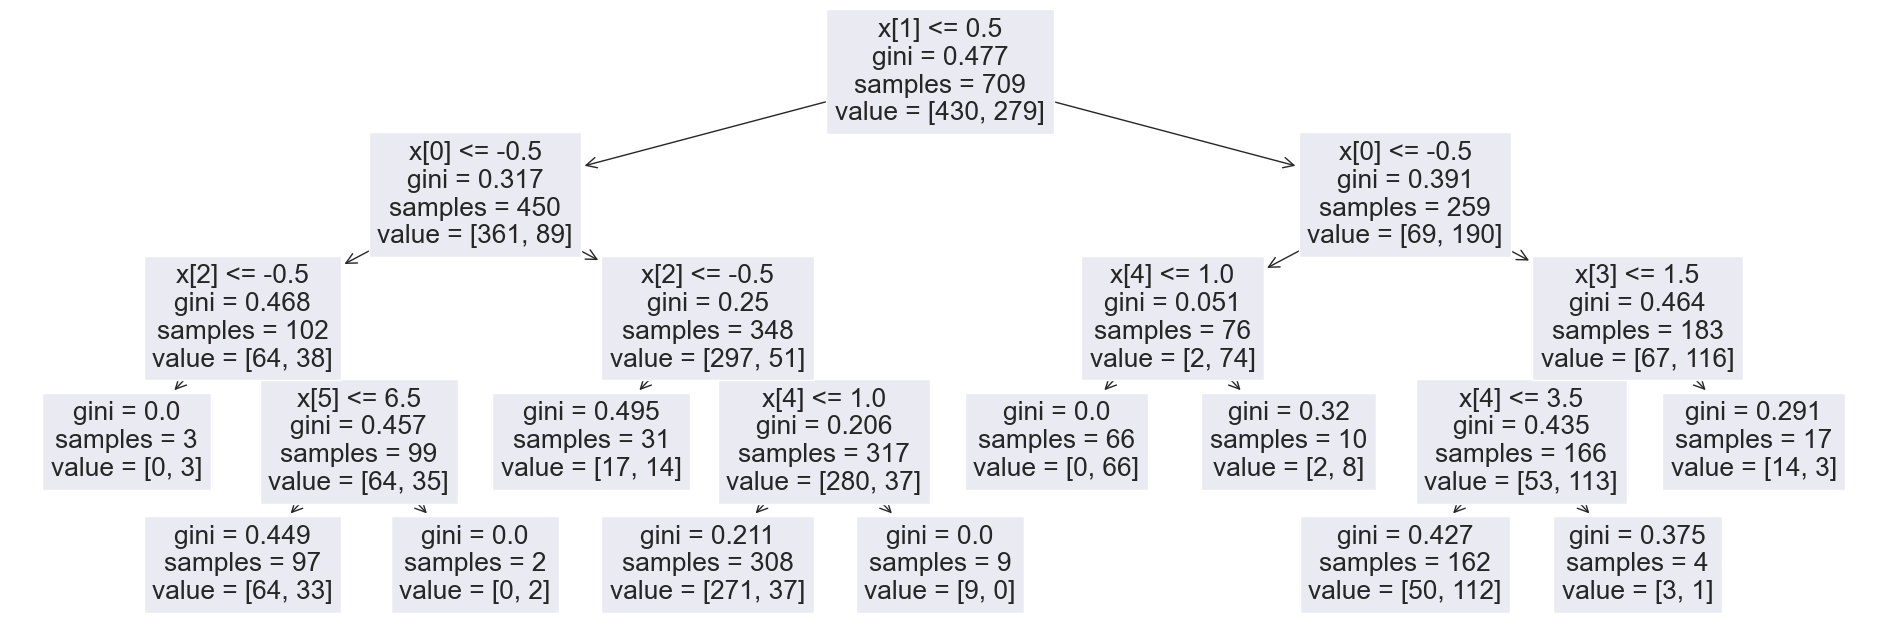

In [1175]:
best_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=32)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model.fit(X_train_scaled,y_train))


In [1176]:
scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
scores

array([0.69226006, 0.8482906 , 0.82070707, 0.74822695, 0.75726496,
       0.76094276, 0.86811146, 0.77052359, 0.68528369, 0.74545455])

In [1177]:
mean_accuracy = sum(scores)/len(scores)
mean_accuracy

0.7697065682038675

In [1178]:
y_pred = best_model.predict(X_test_scaled)

In [1179]:
confusion_matrix(y_test,y_pred)

array([[107,   8],
       [ 21,  42]], dtype=int64)

In [1180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       115
           1       0.84      0.67      0.74        63

    accuracy                           0.84       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.84      0.84      0.83       178



In [1181]:
accuracy = best_model.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 83.71%


In [1182]:
best_model2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=50)

[Text(0.5789473684210527, 0.95, 'x[1] <= 0.5\ngini = 0.477\nsamples = 709\nvalue = [430, 279]'),
 Text(0.3684210526315789, 0.85, 'x[0] <= -0.5\ngini = 0.317\nsamples = 450\nvalue = [361, 89]'),
 Text(0.2631578947368421, 0.75, 'x[2] <= -0.5\ngini = 0.468\nsamples = 102\nvalue = [64, 38]'),
 Text(0.21052631578947367, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3157894736842105, 0.65, 'x[5] <= 6.5\ngini = 0.457\nsamples = 99\nvalue = [64, 35]'),
 Text(0.2631578947368421, 0.55, 'x[5] <= 1.5\ngini = 0.449\nsamples = 97\nvalue = [64, 33]'),
 Text(0.21052631578947367, 0.45, 'x[2] <= 1.5\ngini = 0.464\nsamples = 90\nvalue = [57, 33]'),
 Text(0.15789473684210525, 0.35, 'x[4] <= 1.0\ngini = 0.481\nsamples = 77\nvalue = [46, 31]'),
 Text(0.10526315789473684, 0.25, 'x[2] <= 0.5\ngini = 0.474\nsamples = 75\nvalue = [46, 29]'),
 Text(0.05263157894736842, 0.15, 'gini = 0.483\nsamples = 44\nvalue = [26, 18]'),
 Text(0.15789473684210525, 0.15, 'gini = 0.458\nsamples = 31\nvalue = [20, 11]

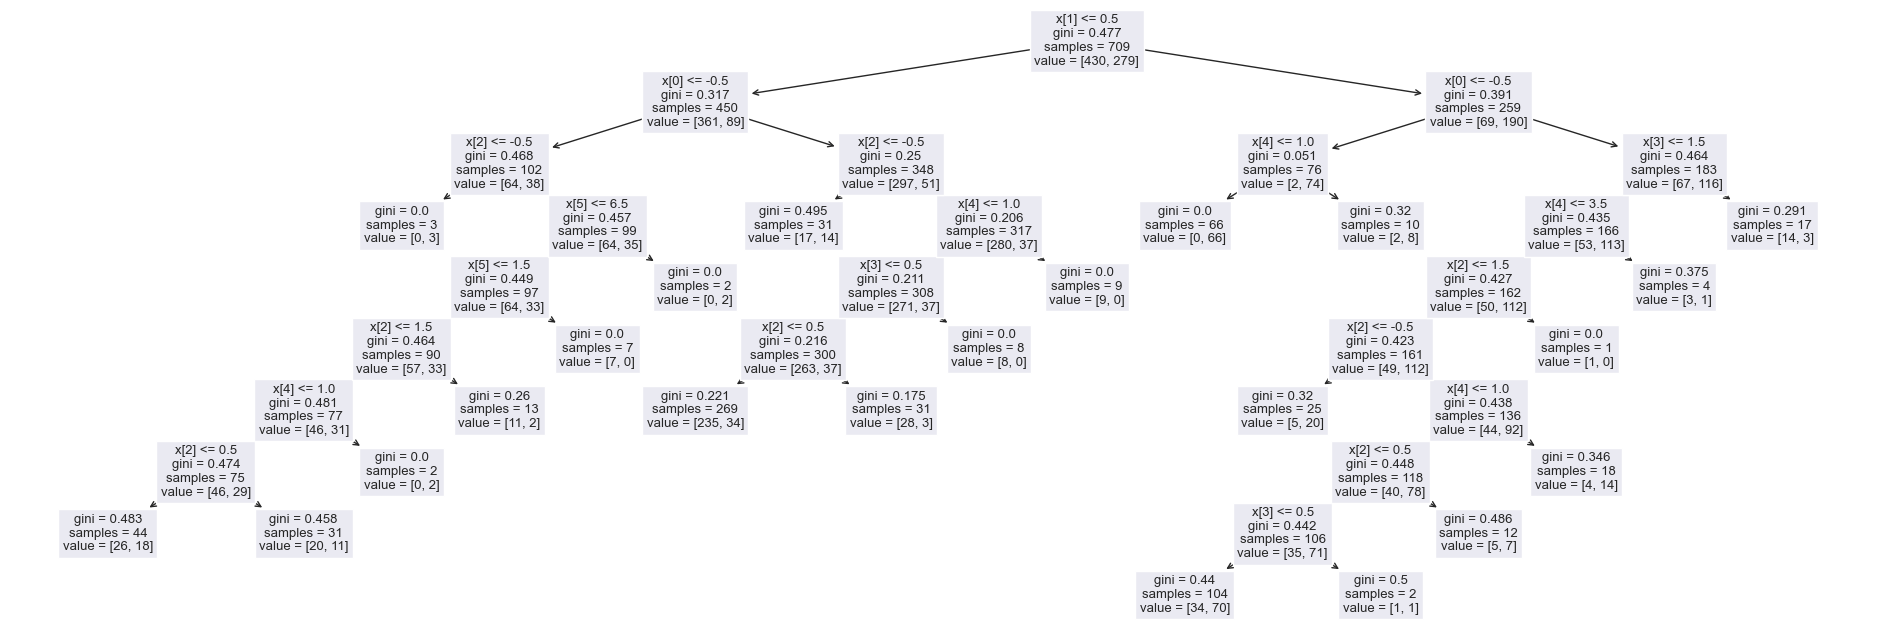

In [1183]:
plt.figure(figsize=(24,8))
tree.plot_tree(best_model2.fit(X_train_scaled,y_train))

In [1184]:
y_pred = best_model2.predict(X_test_scaled)

In [1185]:
confusion_matrix(y_test,y_pred)

array([[107,   8],
       [ 23,  40]], dtype=int64)

In [1186]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       115
           1       0.83      0.63      0.72        63

    accuracy                           0.83       178
   macro avg       0.83      0.78      0.80       178
weighted avg       0.83      0.83      0.82       178



In [1187]:
accuracy2 = best_model2.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy2:.2f}%')

Accuracy: 82.58%


In [1188]:
best_model3 = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=10)

[Text(0.5344827586206896, 0.9444444444444444, 'x[1] <= 0.5\ngini = 0.477\nsamples = 709\nvalue = [430, 279]'),
 Text(0.3275862068965517, 0.8333333333333334, 'x[0] <= -0.5\ngini = 0.317\nsamples = 450\nvalue = [361, 89]'),
 Text(0.20689655172413793, 0.7222222222222222, 'x[2] <= -0.5\ngini = 0.468\nsamples = 102\nvalue = [64, 38]'),
 Text(0.1724137931034483, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.2413793103448276, 0.6111111111111112, 'x[5] <= 6.5\ngini = 0.457\nsamples = 99\nvalue = [64, 35]'),
 Text(0.20689655172413793, 0.5, 'x[5] <= 1.5\ngini = 0.449\nsamples = 97\nvalue = [64, 33]'),
 Text(0.1724137931034483, 0.3888888888888889, 'x[2] <= 1.5\ngini = 0.464\nsamples = 90\nvalue = [57, 33]'),
 Text(0.10344827586206896, 0.2777777777777778, 'x[4] <= 1.0\ngini = 0.481\nsamples = 77\nvalue = [46, 31]'),
 Text(0.06896551724137931, 0.16666666666666666, 'x[2] <= 0.5\ngini = 0.474\nsamples = 75\nvalue = [46, 29]'),
 Text(0.034482758620689655, 0.05555555555555555,

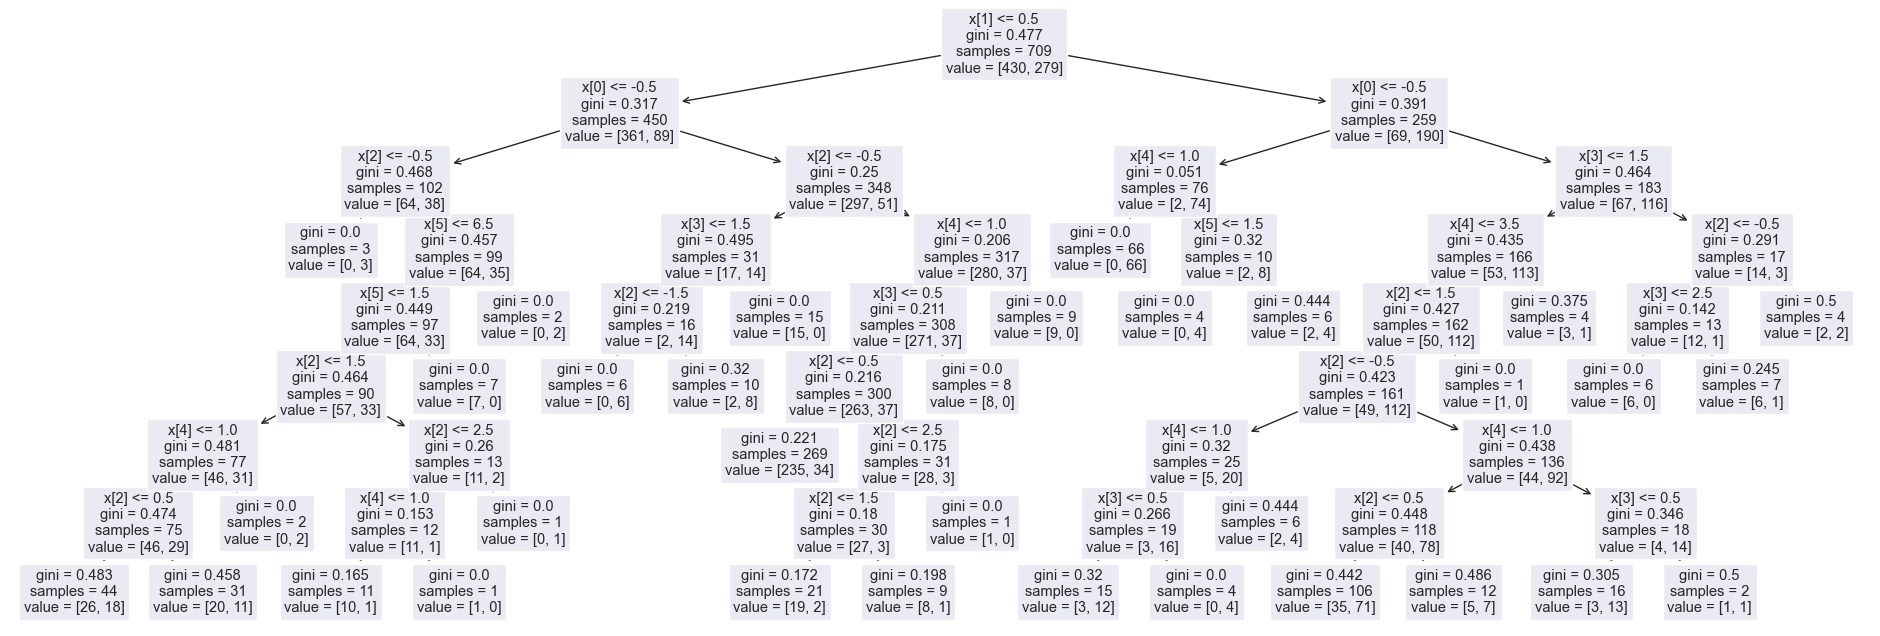

In [1189]:
plt.figure(figsize=(24,8))
tree.plot_tree(best_model3.fit(X_train_scaled,y_train))

In [1190]:
y_pred = best_model3.predict(X_test_scaled)

In [1191]:
confusion_matrix(y_test,y_pred)

array([[84, 31],
       [17, 46]], dtype=int64)

In [1192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       115
           1       0.60      0.73      0.66        63

    accuracy                           0.73       178
   macro avg       0.71      0.73      0.72       178
weighted avg       0.75      0.73      0.74       178



In [1193]:
accuracy3 = best_model3.score(X_test_scaled,y_test) * 100
print(f'Accuracy: {accuracy3:.2f}%')

Accuracy: 73.03%


              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.83      0.73      0.78        75

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.82       178

Accuracy: 82.58%


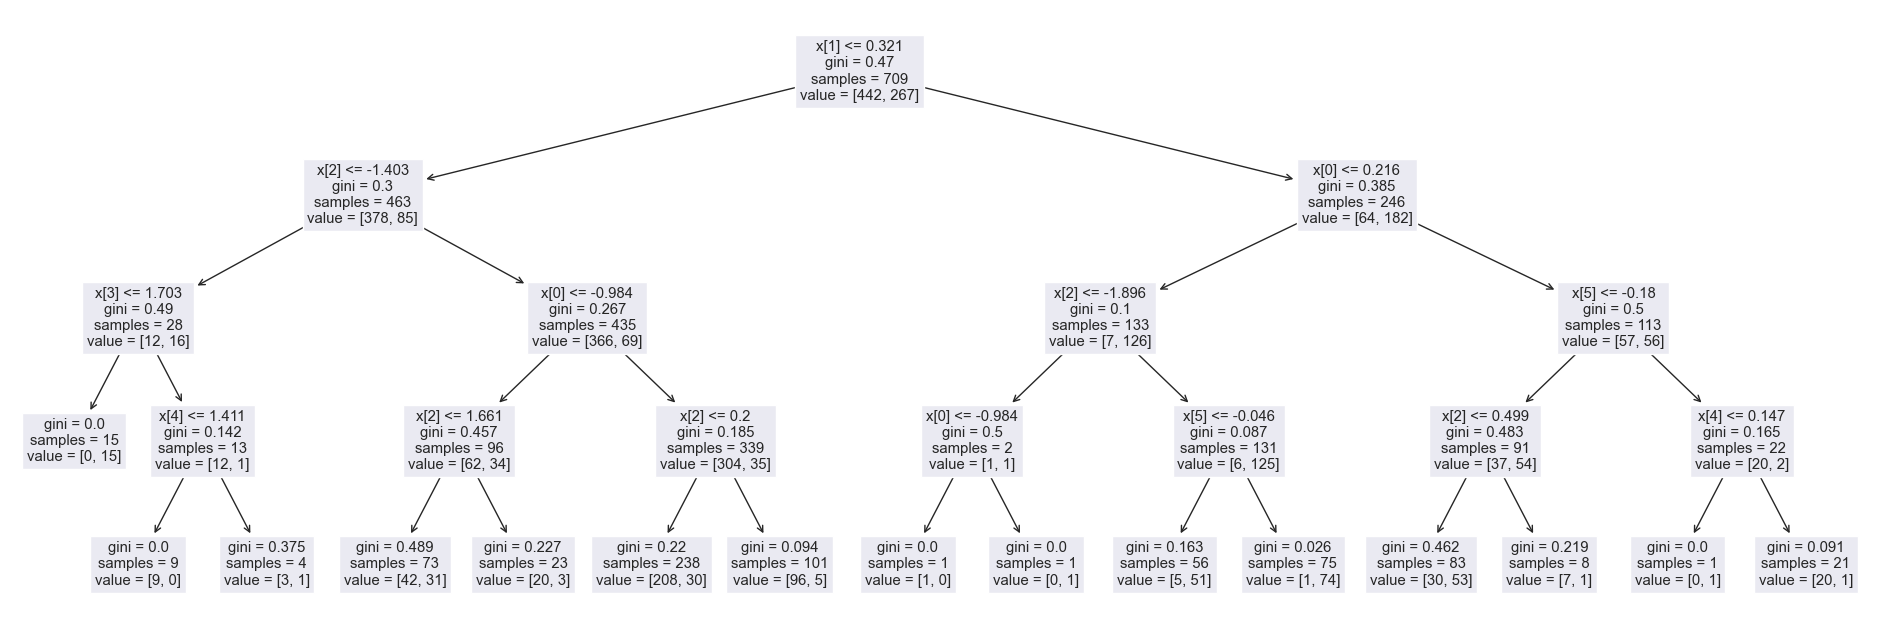

In [1194]:
best_model21 = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model21.fit(X2_train_scaled,y2_train))
y2_pred = best_model21.predict(X2_test_scaled)
confusion_matrix(y2_test,y2_pred)
print(classification_report(y2_test,y2_pred))
accuracy21 = best_model21.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy21:.2f}%')

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       103
           1       0.81      0.73      0.77        75

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.81       178
weighted avg       0.81      0.81      0.81       178

Accuracy: 81.46%


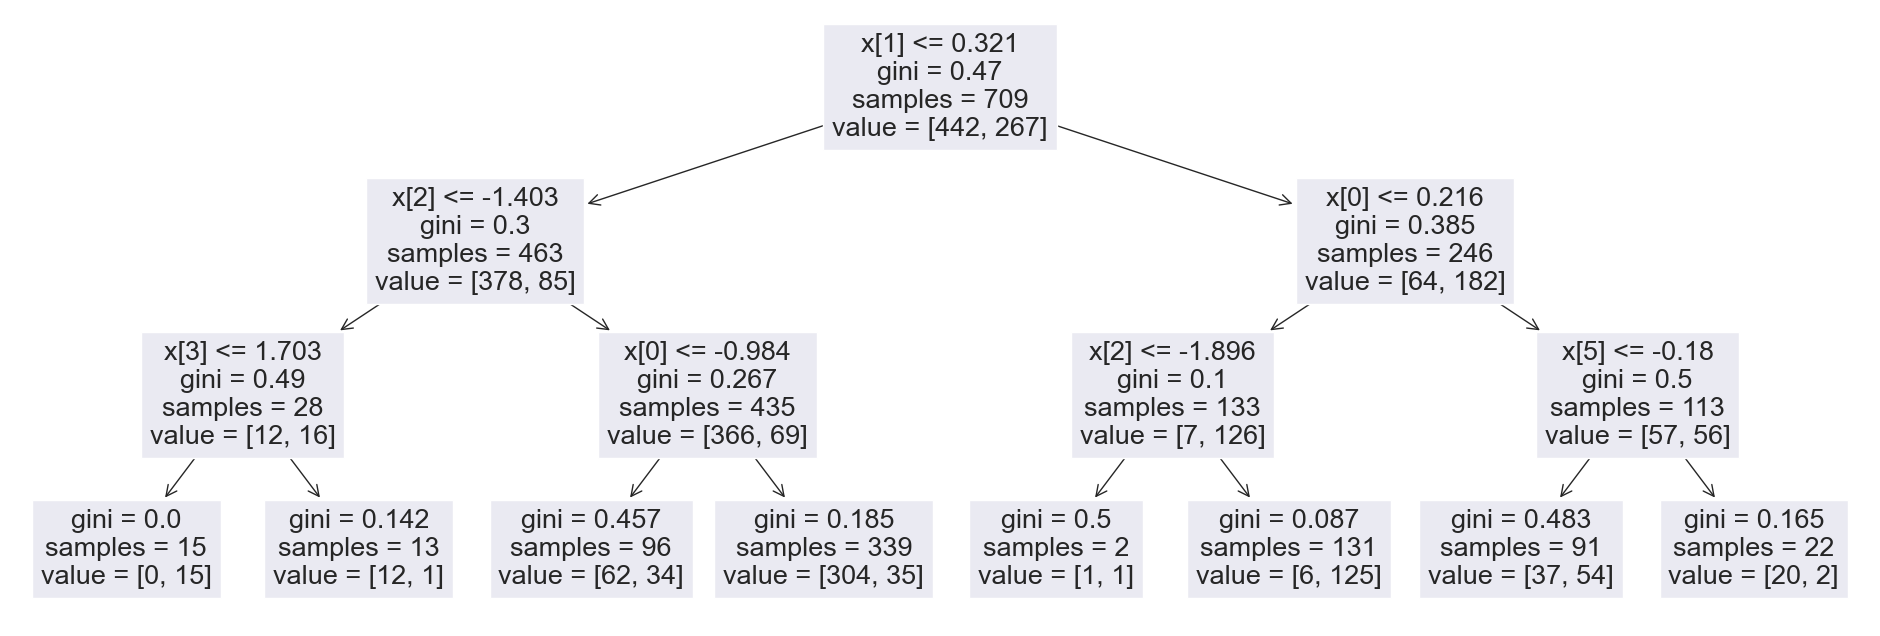

In [1195]:
best_model22 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=10)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model22.fit(X2_train_scaled,y2_train))
y2_pred = best_model22.predict(X2_test_scaled)
confusion_matrix(y2_test,y2_pred)
print(classification_report(y2_test,y2_pred))
accuracy22 = best_model22.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy22:.2f}%')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.80      0.73      0.76        75

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Accuracy: 80.90%


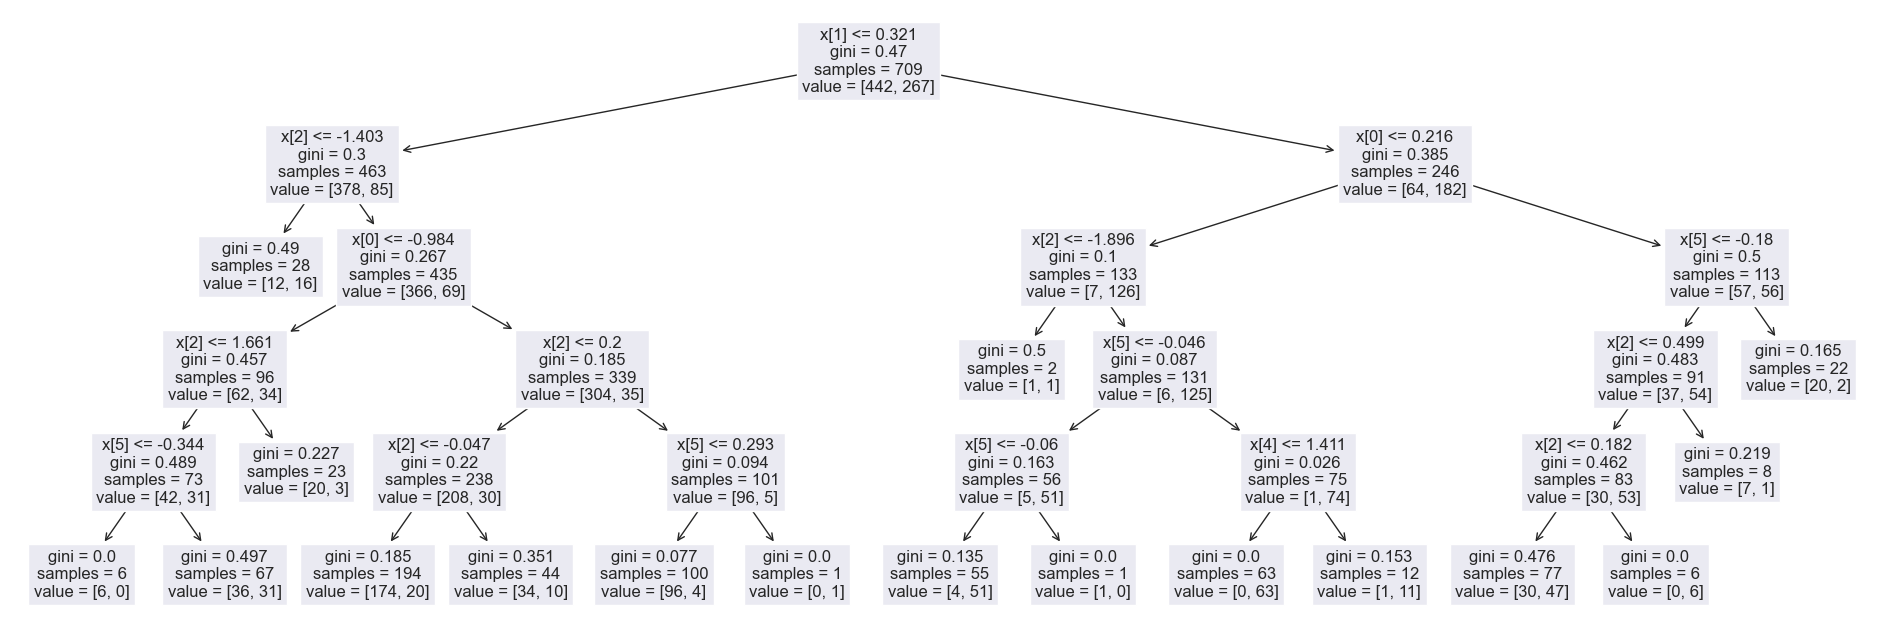

In [1196]:
best_model23 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=37)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model23.fit(X2_train_scaled,y2_train))
y2_pred = best_model23.predict(X2_test_scaled)
confusion_matrix(y2_test,y2_pred)
print(classification_report(y2_test,y2_pred))
accuracy23 = best_model23.score(X2_test_scaled,y2_test) * 100
print(f'Accuracy: {accuracy23:.2f}%')

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       217
           1       0.70      0.54      0.61       138

    accuracy                           0.73       355
   macro avg       0.72      0.70      0.70       355
weighted avg       0.73      0.73      0.72       355

Accuracy: 73.24%


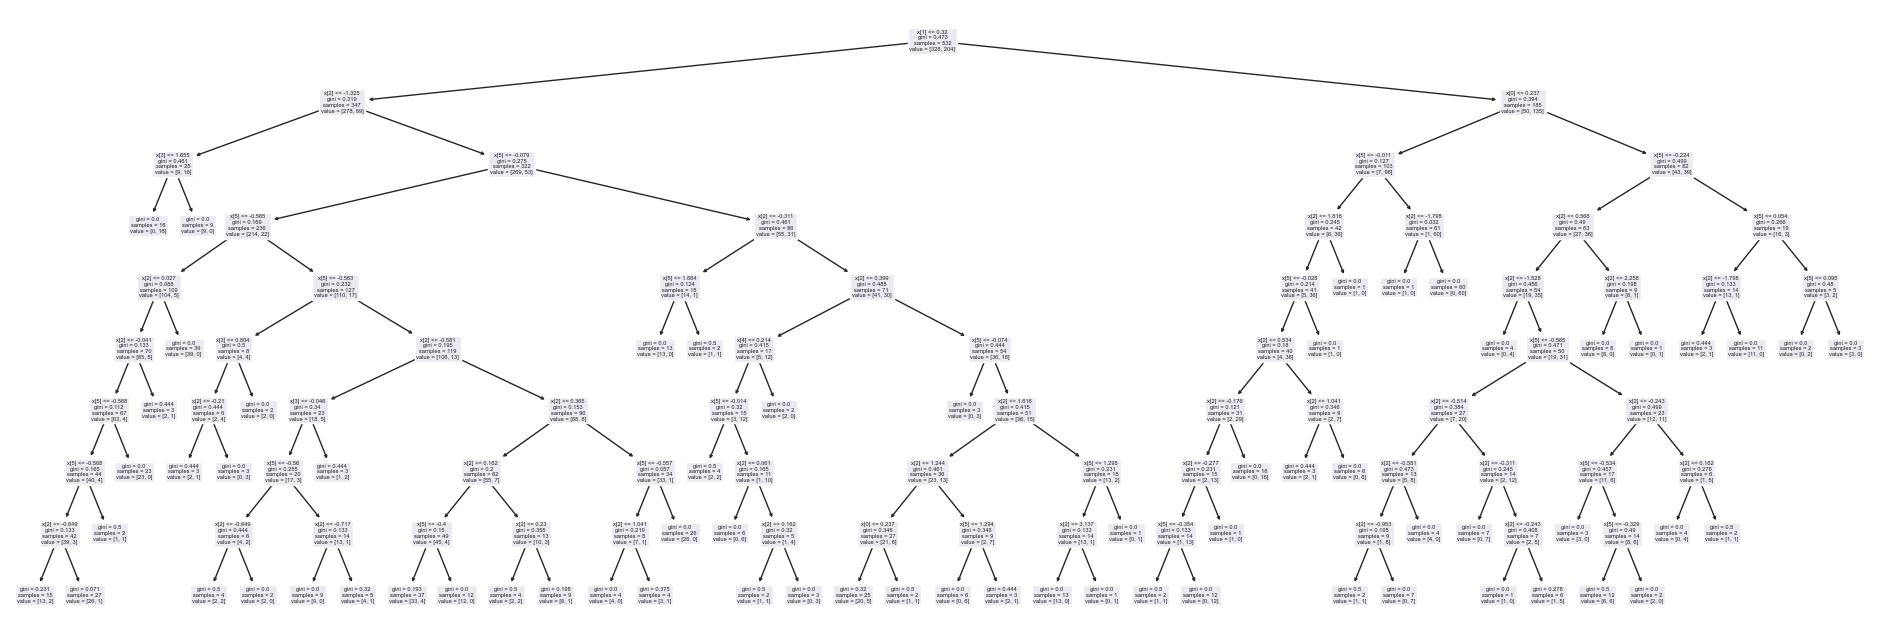

In [1197]:
best_model31 = tree.DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_split=5)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model31.fit(X3_train_scaled,y3_train))
y3_pred = best_model31.predict(X3_test_scaled)
confusion_matrix(y3_test,y3_pred)
print(classification_report(y3_test,y3_pred))
accuracy31 = best_model31.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy31:.2f}%')

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       217
           1       0.70      0.59      0.64       138

    accuracy                           0.74       355
   macro avg       0.73      0.72      0.72       355
weighted avg       0.74      0.74      0.74       355

Accuracy: 74.37%


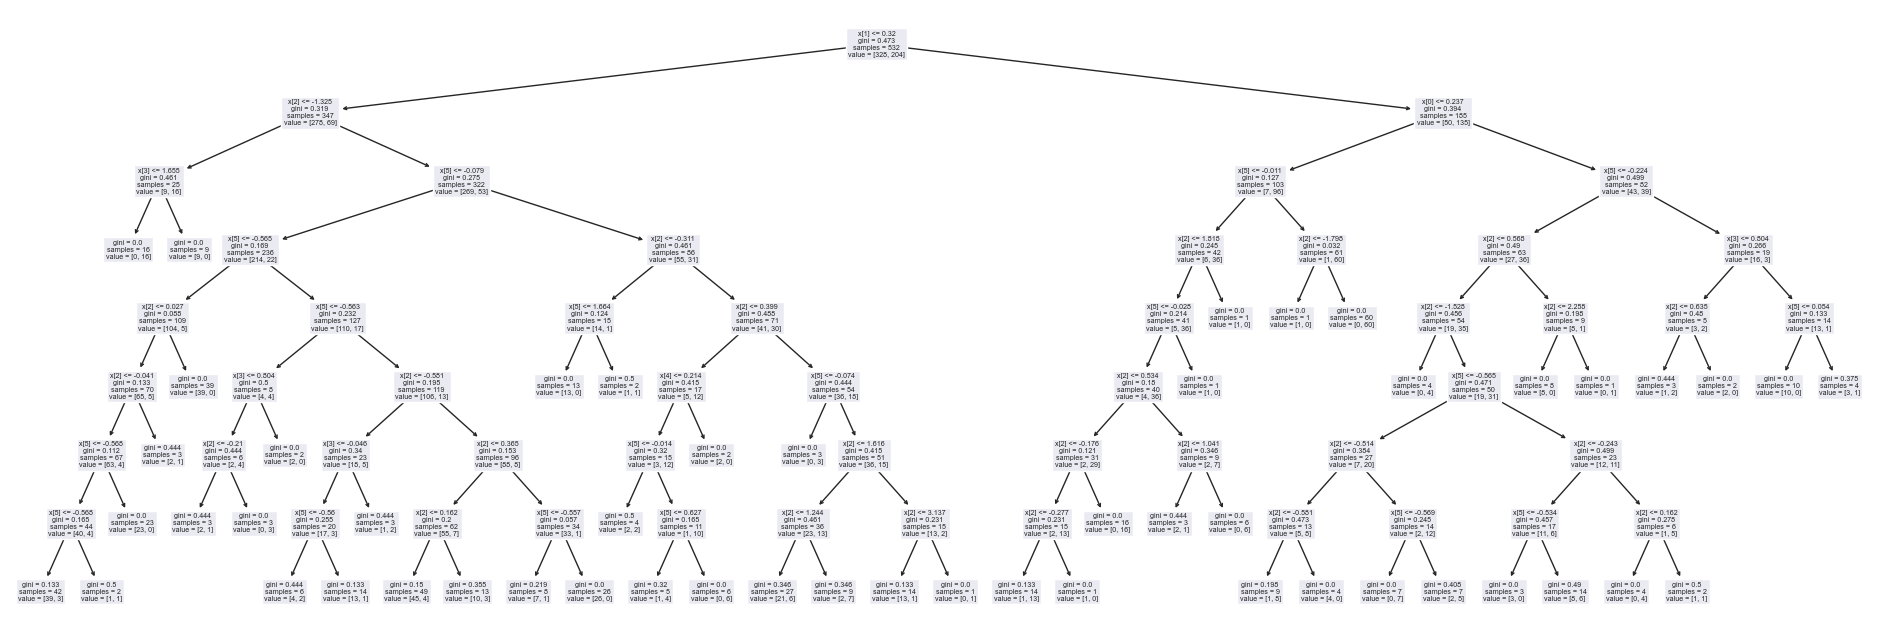

In [1198]:
best_model32 = tree.DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=5)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model32.fit(X3_train_scaled,y3_train))
y3_pred = best_model32.predict(X3_test_scaled)
confusion_matrix(y3_test,y3_pred)
print(classification_report(y3_test,y3_pred))
accuracy32 = best_model32.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy32:.2f}%')

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       217
           1       0.83      0.73      0.78       138

    accuracy                           0.84       355
   macro avg       0.83      0.82      0.82       355
weighted avg       0.84      0.84      0.83       355

Accuracy: 83.66%


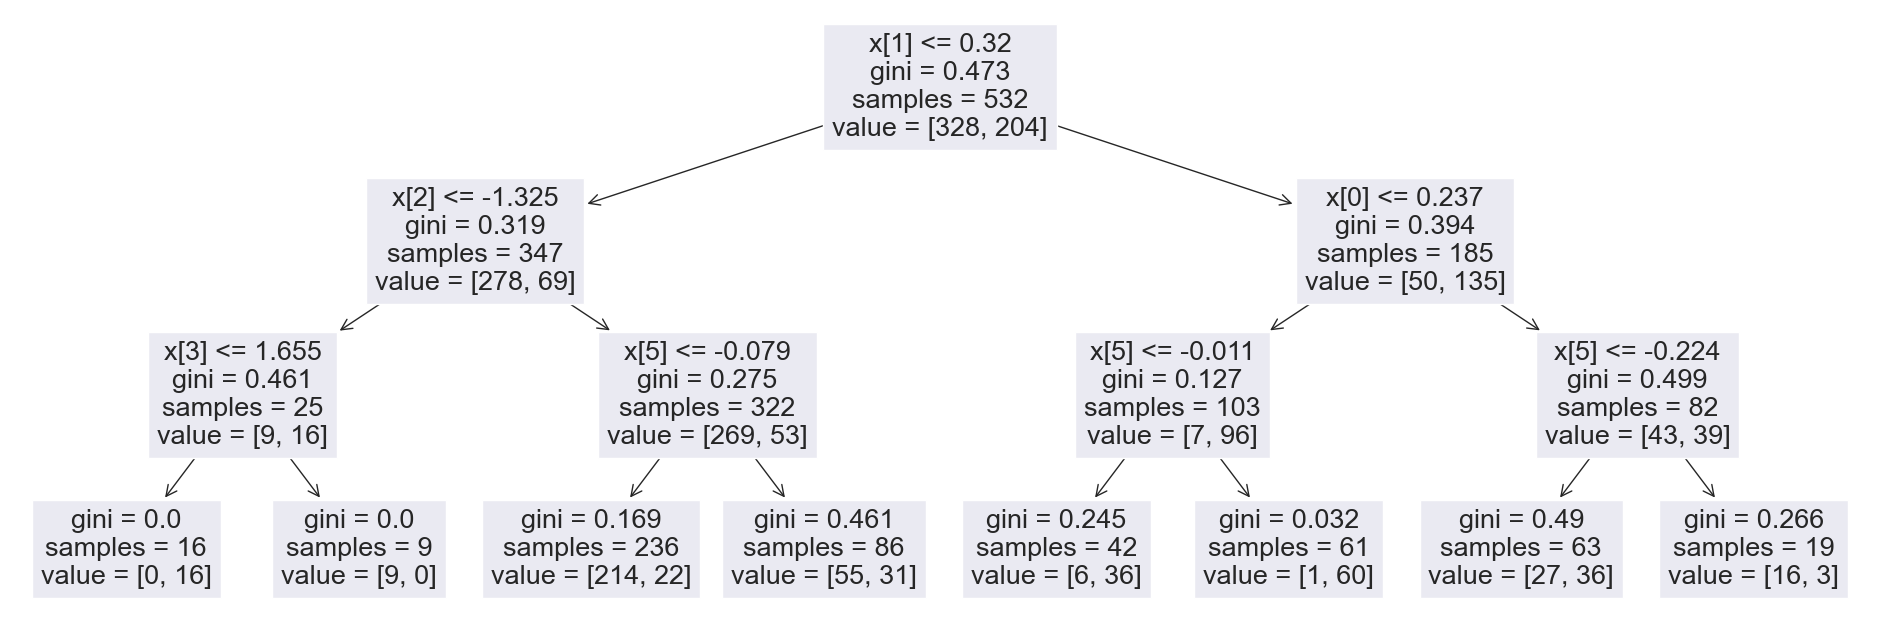

In [1199]:
best_model33 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model33.fit(X3_train_scaled,y3_train))
y3_pred = best_model33.predict(X3_test_scaled)
confusion_matrix(y3_test,y3_pred)
print(classification_report(y3_test,y3_pred))
accuracy33 = best_model33.score(X3_test_scaled,y3_test) * 100
print(f'Accuracy: {accuracy33:.2f}%')

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       164
           1       0.90      0.53      0.67       103

    accuracy                           0.80       267
   macro avg       0.83      0.75      0.76       267
weighted avg       0.82      0.80      0.78       267

Accuracy: 79.78%


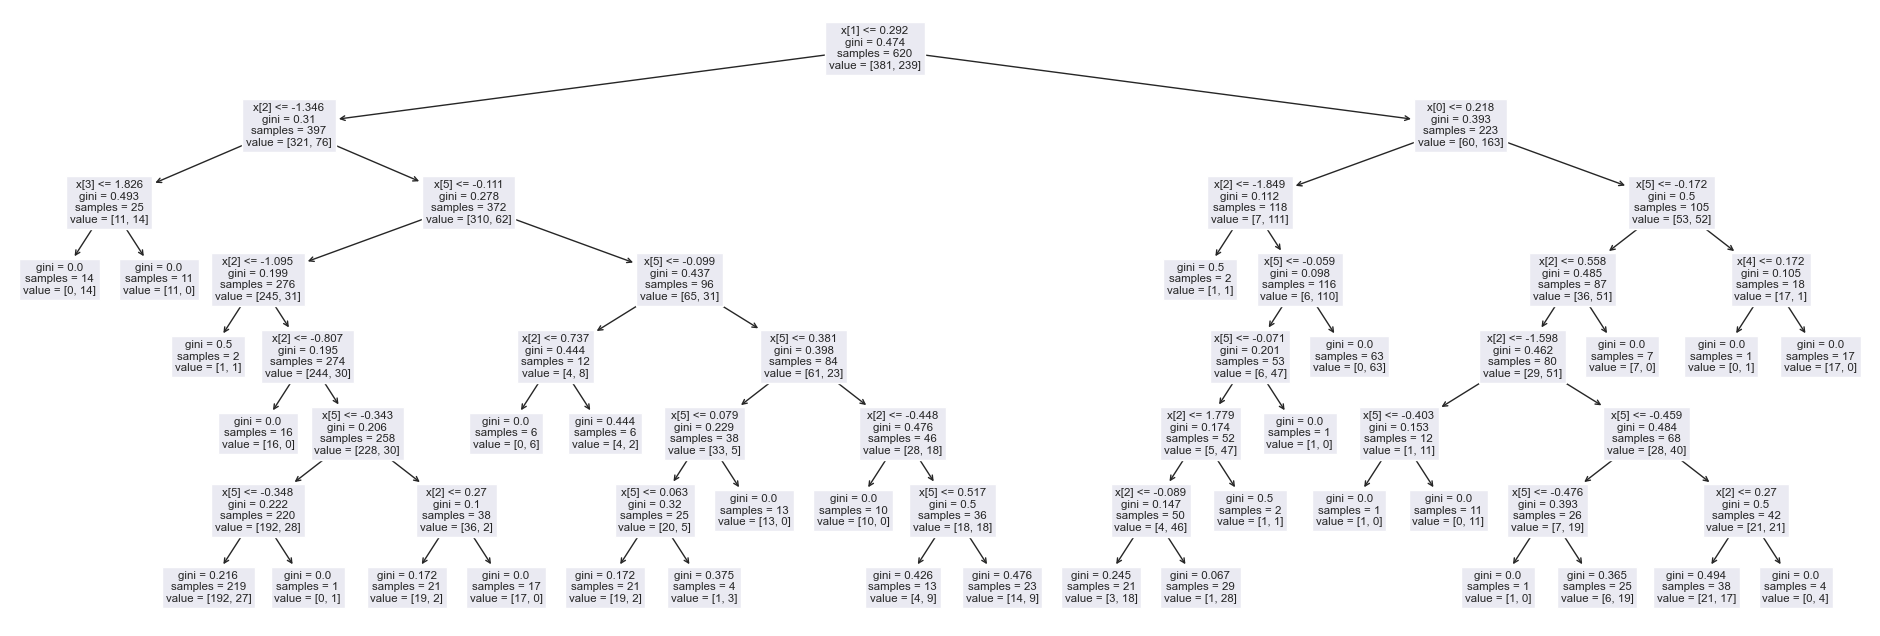

In [1200]:
best_model41 = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=8)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model41.fit(X4_train_scaled,y4_train))
y4_pred = best_model41.predict(X4_test_scaled)
confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))
accuracy41 = best_model41.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy41:.2f}%')

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       164
           1       0.81      0.71      0.76       103

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267

Accuracy: 82.40%


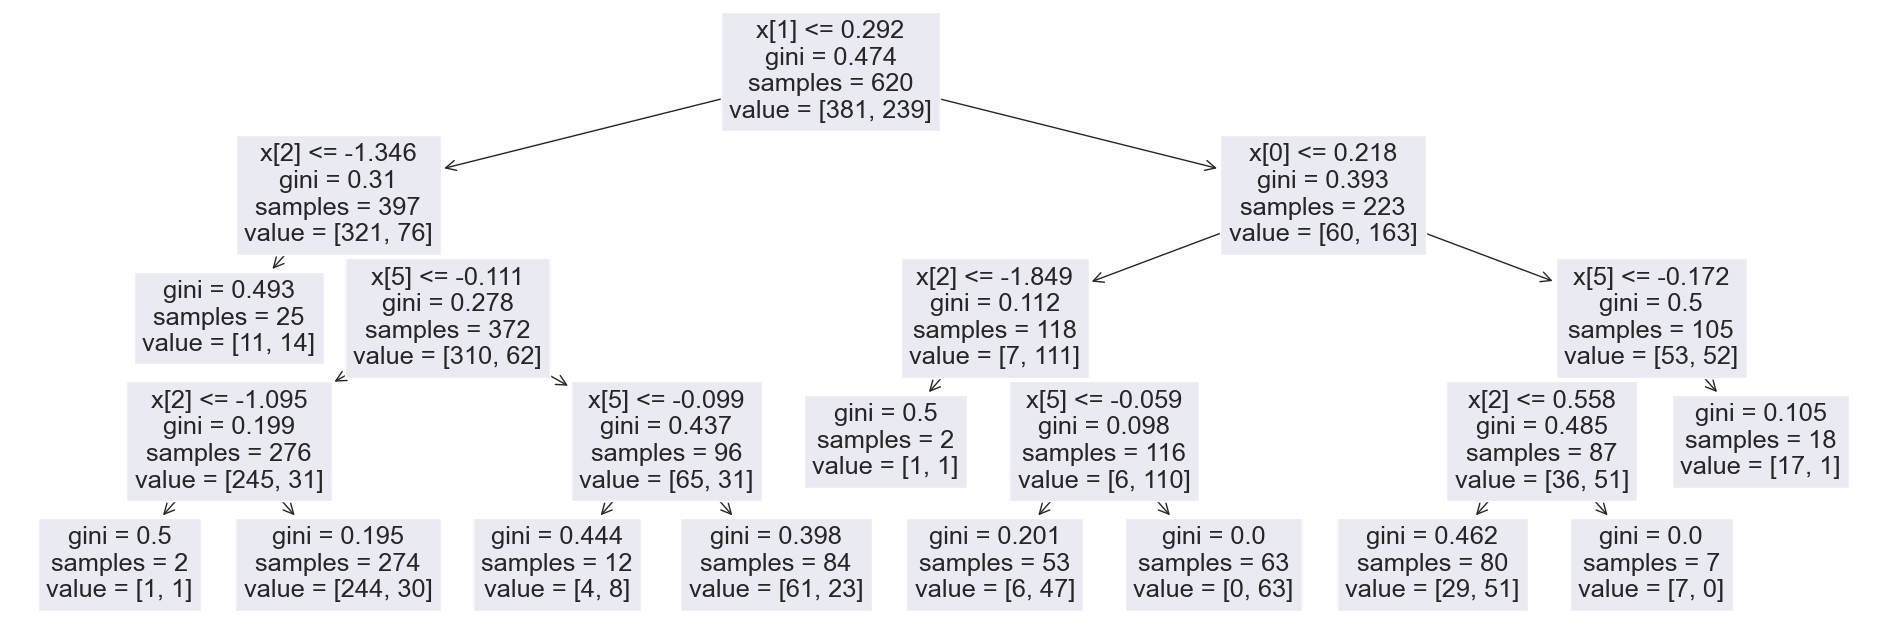

In [1201]:
best_model42 = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=32)
plt.figure(figsize=(24,8))
tree.plot_tree(best_model42.fit(X4_train_scaled,y4_train))
y4_pred = best_model42.predict(X4_test_scaled)
confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))
accuracy42 = best_model42.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy42:.2f}%')

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       164
           1       0.86      0.72      0.78       103

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267

Accuracy: 84.64%


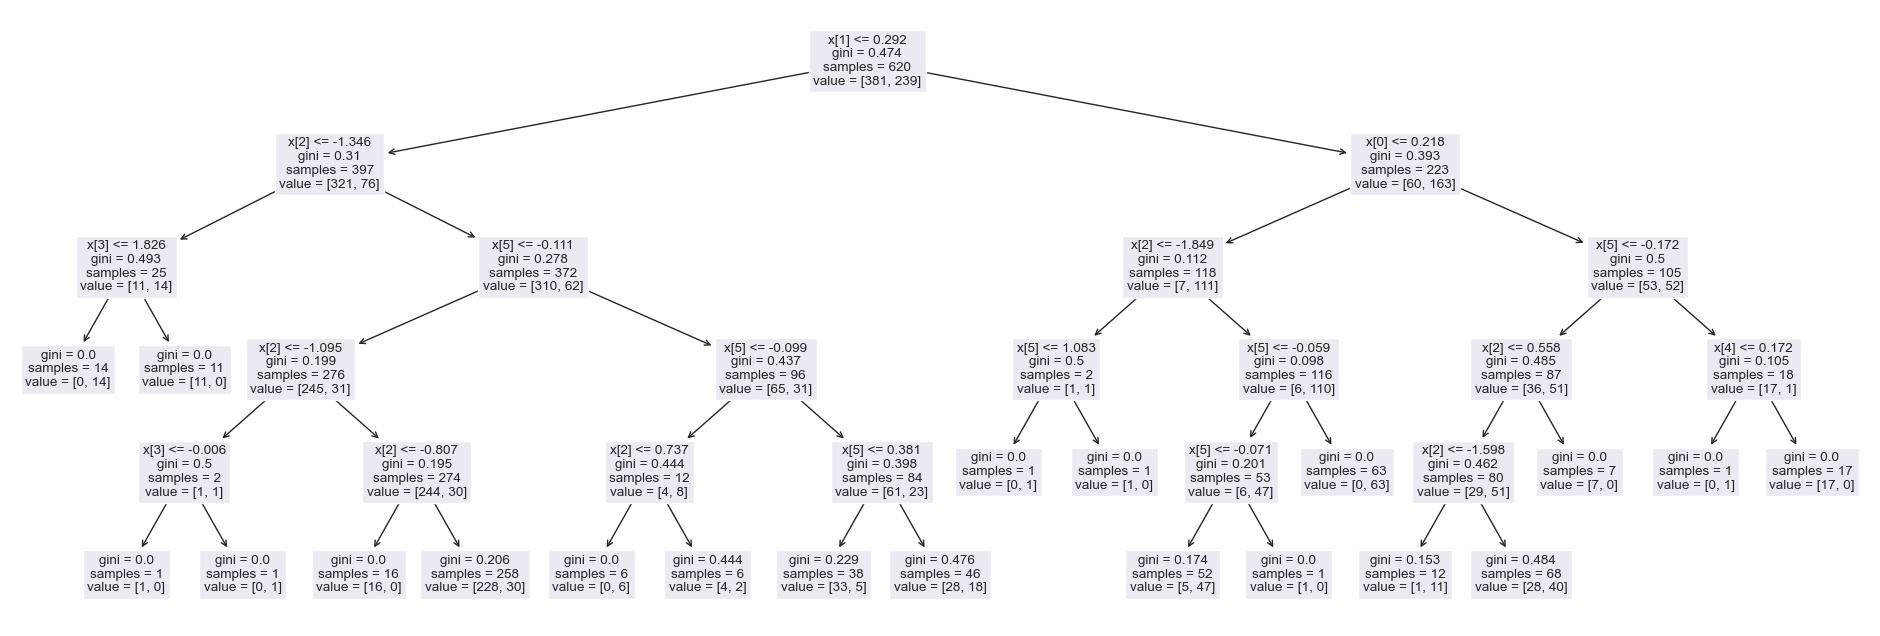

In [1202]:
best_model43 = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2) #4 and 20/12

plt.figure(figsize=(24,8))
tree.plot_tree(best_model43.fit(X4_train_scaled,y4_train))
y4_pred = best_model43.predict(X4_test_scaled)

confusion_matrix(y4_test,y4_pred)
print(classification_report(y4_test,y4_pred))

accuracy43 = best_model43.score(X4_test_scaled,y4_test) * 100
print(f'Accuracy: {accuracy43:.2f}%')

Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 82.58%


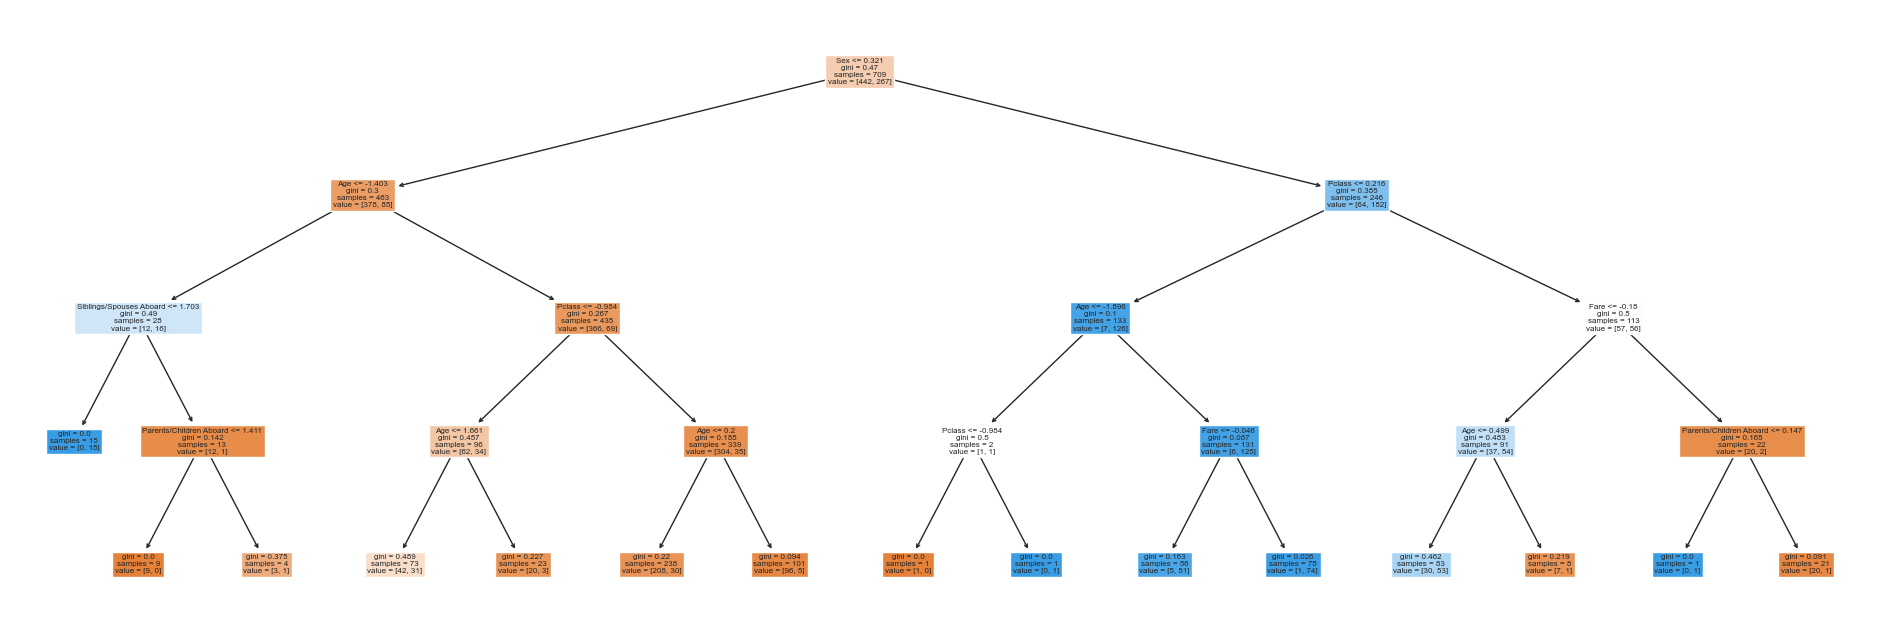

In [1203]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#  (X4_train_scaled, y4_train, X4_test_scaled, y4_test)

# диапазондар
max_depth_values = range(1, 41)
min_samples_split_values = range(2, 200)

best_accuracy = 0
best_params = {'max_depth': None, 'min_samples_split': None}

# Цикл
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # модель
        model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_split=min_samples_split)
        
        # train
        model.fit(X2_train_scaled, y2_train)
        
        # prediction
        y2_pred = model.predict(X2_test_scaled)
        
        # accuracy
        current_accuracy = accuracy_score(y2_test, y2_pred) * 100
        
        # bast accuracy
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy 
            best_params['max_depth'] = max_depth
            best_params['min_samples_split'] = min_samples_split

# best accuracy шығару
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

# соңғы вариант
best_model = DecisionTreeClassifier(criterion='gini', max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
best_model.fit(X2_train_scaled, y2_train)

# tree decision
plt.figure(figsize=(24, 8))
tree.plot_tree(best_model, filled=True, feature_names=list(X2_train.columns))
plt.show()

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 83.66%


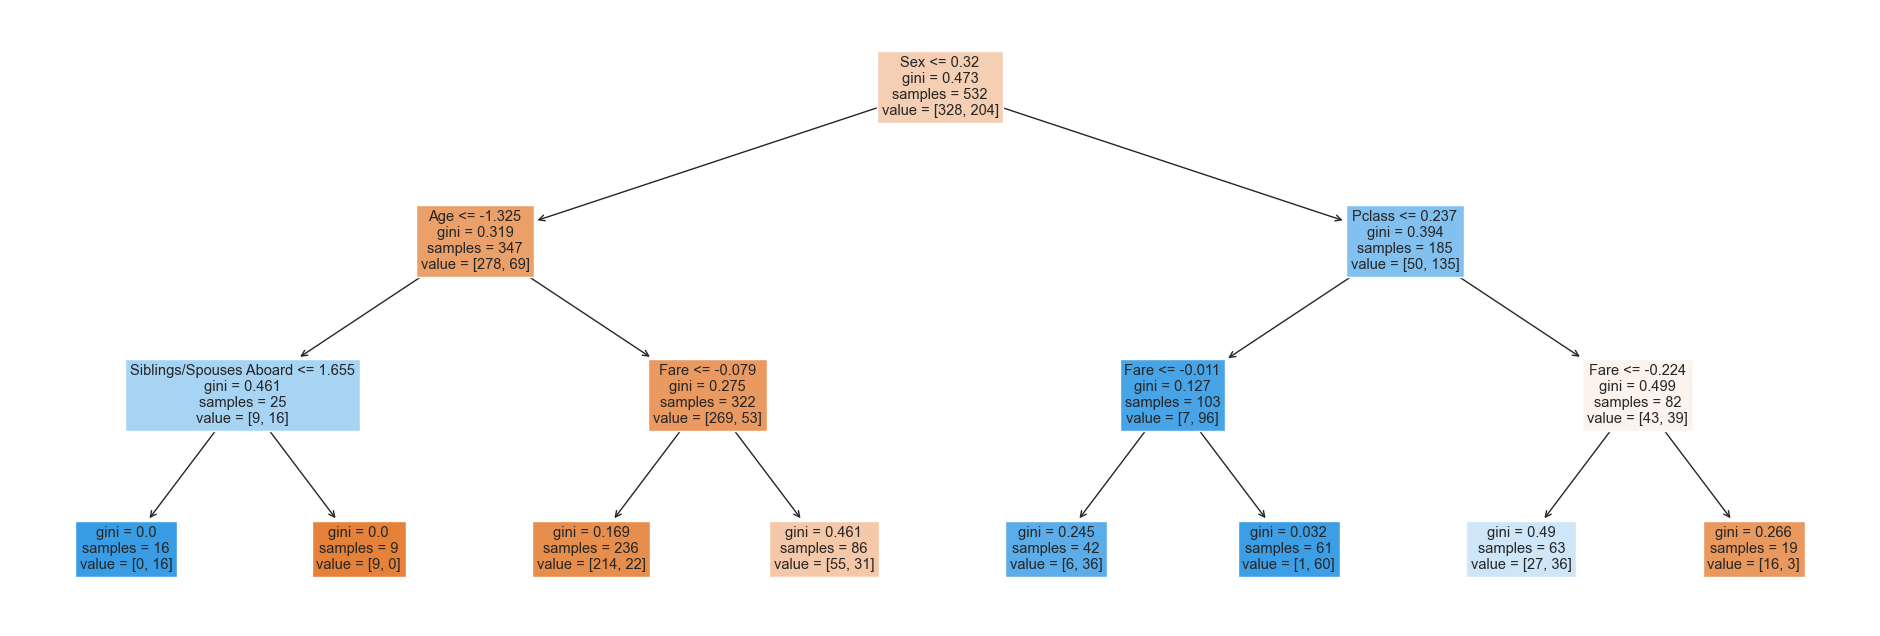

In [1204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#  (X4_train_scaled, y4_train, X4_test_scaled, y4_test)

# диапазондар
max_depth_values = range(1, 41)
min_samples_split_values = range(2, 200)

best_accuracy = 0
best_params = {'max_depth': None, 'min_samples_split': None}

# Цикл
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # модель
        model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_split=min_samples_split)
        
        # train
        model.fit(X3_train_scaled, y3_train)
        
        # prediction
        y3_pred = model.predict(X3_test_scaled)
        
        # accuracy
        current_accuracy = accuracy_score(y3_test, y3_pred) * 100
        
        # bast accuracy
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy 
            best_params['max_depth'] = max_depth
            best_params['min_samples_split'] = min_samples_split

# best accuracy шығару
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

# соңғы вариант
best_model = DecisionTreeClassifier(criterion='gini', max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
best_model.fit(X3_train_scaled, y3_train)

# tree decision
plt.figure(figsize=(24, 8))
tree.plot_tree(best_model, filled=True, feature_names=list(X3_train.columns))
plt.show()


Best Parameters: {'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 84.64%


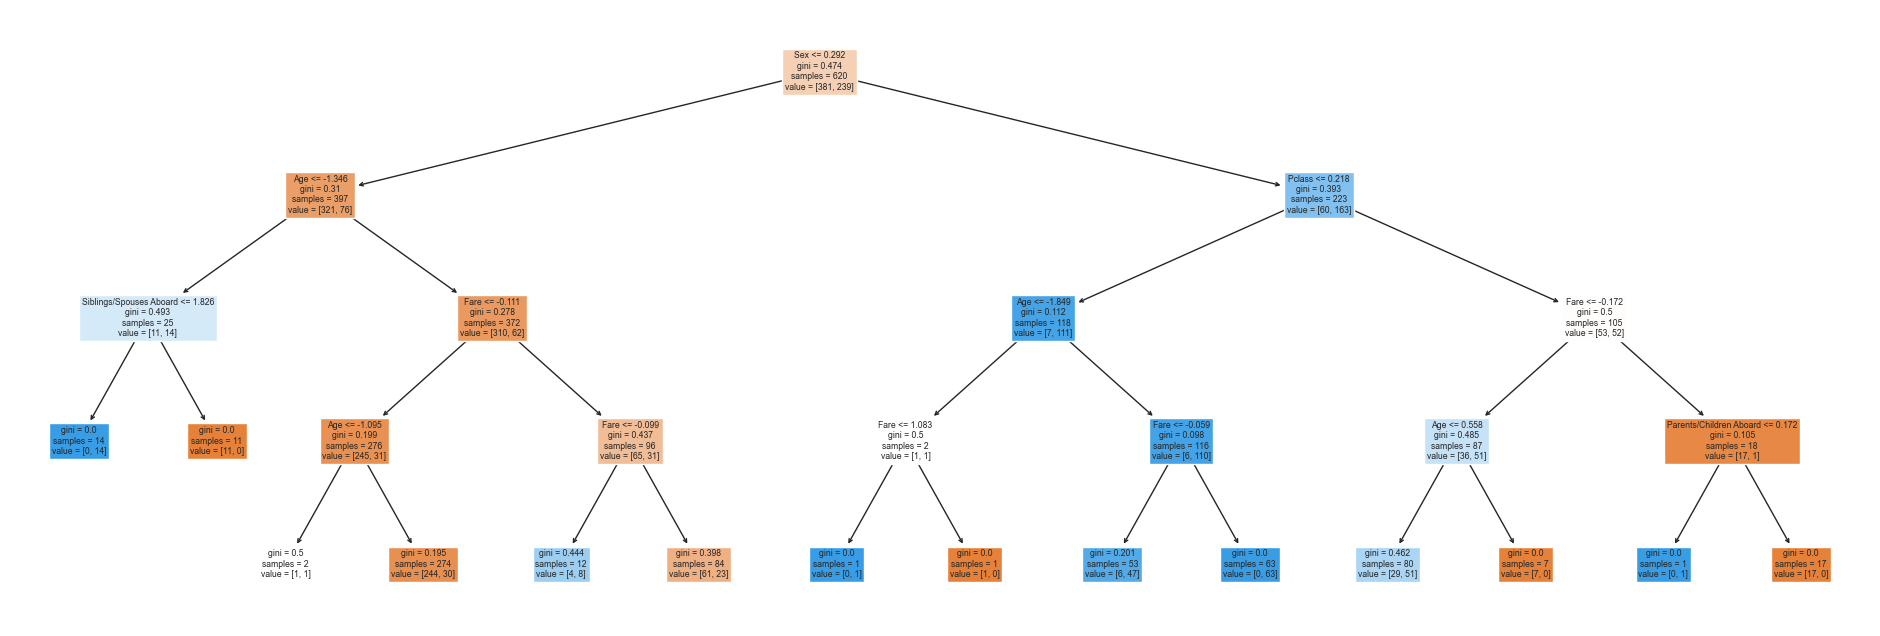

In [1205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#  (X4_train_scaled, y4_train, X4_test_scaled, y4_test)

# диапазондар
max_depth_values = range(1, 41)
min_samples_split_values = range(2, 200)

best_accuracy = 0
best_params = {'max_depth': None, 'min_samples_split': None}

# Цикл
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        # модель
        model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_split=min_samples_split)
        
        # train
        model.fit(X4_train_scaled, y4_train)
        
        # prediction
        y4_pred = model.predict(X4_test_scaled)
        
        # accuracy
        current_accuracy = accuracy_score(y4_test, y4_pred) * 100
        
        # bast accuracy
        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy 
            best_params['max_depth'] = max_depth
            best_params['min_samples_split'] = min_samples_split

# best accuracy шығару
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.2f}%")

# соңғы вариант
best_model = DecisionTreeClassifier(criterion='gini', max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
best_model.fit(X4_train_scaled, y4_train)

# tree decision
plt.figure(figsize=(24, 8))
tree.plot_tree(best_model, filled=True, feature_names=list(X4_train.columns))
plt.show()

#### gsearch-тың бұл циклд арқылы ең жоғарғы точностьтты анықтаудың артықшылығы:
#### 1.Gsearch тезірақ жұмыс жасайды
#### 2. Кросс валидация жасауға болады

In [1206]:
import pandas as pd

data = {
    '': ['max1', 'max2', 'max3', 'Average Accuracy'],
    'x1:test_size=0.2, random_state=70': [accuracy, accuracy2, accuracy3, (accuracy+accuracy2+accuracy3)/3],
    'x2:test_size=0.2, random_state=80': [accuracy21, accuracy22, accuracy23,(accuracy21+accuracy22+accuracy23)/3],
    'x3:test_size=0.4, random_state=400': [accuracy31, accuracy32, accuracy33,(accuracy31+accuracy32+accuracy33)/3],
    'x4:test_size=0.3, random_state=41': [accuracy41, accuracy42, accuracy43,(accuracy41+accuracy42+accuracy43)/3],

}

data2 = pd.DataFrame(data)


# data2.set_index('', inplace=True)
# data2['Average Accuracy'] = data2.mean(axis=1)
# average_accuracy_overall = data2.mean().mean()
data2

,,"x1:test_size=0.2, random_state=70","x2:test_size=0.2, random_state=80","x3:test_size=0.4, random_state=400","x4:test_size=0.3, random_state=41"
0,max1,83.707865,82.584270,73.239437,79.775281
1,max2,82.584270,81.460674,74.366197,82.397004
2,max3,73.033708,80.898876,83.661972,84.644195
3,Average Accuracy,79.775281,81.647940,77.089202,82.272160


In [1211]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix


# cm = confusion_matrix(y4_test, best_model43.predict(X4_test))

# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

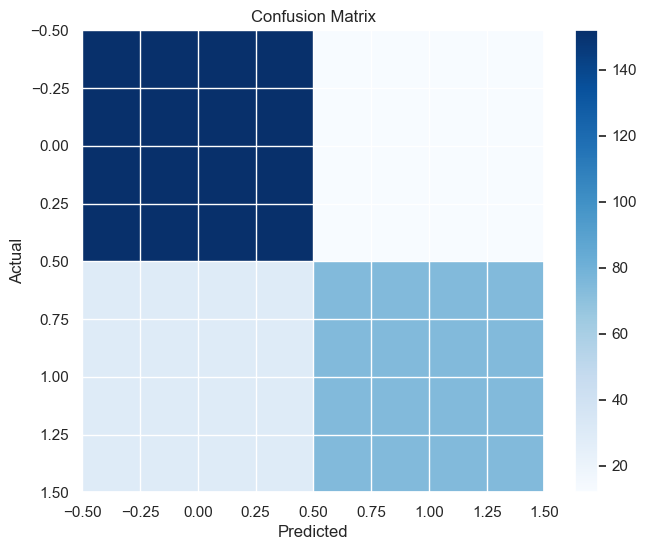

In [1212]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
y4_pred = best_model43.predict(X4_test_scaled)
cm = confusion_matrix(y4_test, y4_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()